In [94]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [95]:
train_df = pd.read_csv("csv preparado/train_ready.csv", index_col = 0)
train_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,3,4,2,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,4,1,3,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,4,0,3,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,2,1,4,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,4,2,3,60.0,62.0,4.51,4.55,2.72,447


In [96]:
columnas = [i for i in train_df.columns if i not in ["price"]]
X = train_df[columnas]
y = train_df["price"]

In [80]:
"""pipeline = [
    StandardScaler(),
    Normalizer()
]

transformer = make_pipeline(*pipeline)

X_data = transformer.fit_transform(X)
"""

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Primer modelo: ExtraTreesRegressor

In [98]:
trees = ExtraTreesRegressor(n_estimators = 1000, n_jobs = -1)

trees.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=1000, n_jobs=-1)

In [99]:
y_pred = trees.predict(X_test)

In [100]:
print(f"r2: {round(r2_score(y_pred, y_test),3)}")
print(f"RMSE: {round(sqrt(mean_squared_error(y_pred, y_test)),3)}")

r2: 0.98
RMSE: 565.757


## Hyperparameter Tuning

In [12]:
params = {
 'n_estimators': [200, 400, 600, 800, 1000, 1200]}

In [13]:
trees = ExtraTreesRegressor()

trees.fit(X_train, y_train)

ExtraTreesRegressor()

In [14]:
grid = GridSearchCV(trees,params,verbose=1, n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.8min finished


GridSearchCV(estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200]},
             verbose=1)

In [15]:
print(grid.best_params_)

{'n_estimators': 800}


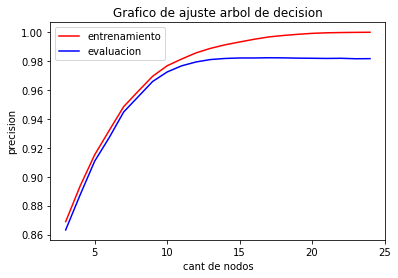

In [30]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 25))

for deep in max_deep_list:
    arbol3 = ExtraTreesRegressor(max_depth=deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

In [31]:
paramets = {'max_depth': [10, 12, 14],
 'n_estimators': [600, 800, 1000]}

In [32]:
trees = ExtraTreesRegressor()

trees.fit(X_train, y_train)

ExtraTreesRegressor()

In [33]:
grid = GridSearchCV(trees,paramets,verbose=1, n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.0min finished


GridSearchCV(estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14],
                         'n_estimators': [600, 800, 1000]},
             verbose=1)

In [34]:
print(grid.best_params_)

{'max_depth': 14, 'n_estimators': 1000}


In [111]:
print(grid.best_score_)

0.9801495195917077


## Posible Overfitting: Buen ajuste con train pero no con test. Reducimos variables que están muy relacionadas para ver si mejora el RMSE ya que PCA no nos ha funcionado

In [127]:
columnas = [i for i in train_df.columns if i not in ["x", "y", "z","price"]]
X2 = train_df[columnas]
X2.head()

,carat,cut,color,clarity,depth,table
id,,,,,,
0,1.12,3,4,2,61.6,59.0
1,1.14,4,1,3,60.0,54.0
2,0.90,4,0,3,60.3,63.0
3,0.71,2,1,4,61.9,54.0
4,0.34,4,2,3,60.0,62.0


In [115]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2)

In [116]:
trees2 = ExtraTreesRegressor(n_estimators = 1000, max_depth= 14, n_jobs = -1)

trees2.fit(X2_train, y2_train)

ExtraTreesRegressor(max_depth=14, n_estimators=1000, n_jobs=-1)

In [119]:
y2_pred = trees2.predict(X2_test)

In [120]:
print(f"r2: {round(r2_score(y2_pred, y2_test),3)}")
print(f"RMSE: {round(sqrt(mean_squared_error(y2_pred, y2_test)),3)}")

r2: 0.98
RMSE: 565.518


## Entrenando modelo con todo el df

In [124]:
trees = ExtraTreesRegressor(n_estimators = 1000, max_depth= 14, n_jobs = -1)

trees.fit(X2, y)

ExtraTreesRegressor(max_depth=14, n_estimators=1000, n_jobs=-1)

In [125]:
y2_pred = trees.predict(X2_test)

In [126]:
print(f"r2: {round(r2_score(y2_pred, y2_test),3)}")
print(f"RMSE: {round(sqrt(mean_squared_error(y2_pred, y2_test)),3)}")

r2: 0.988
RMSE: 435.554


## Predicción

In [104]:
predict_df = pd.read_csv("csv preparado/predict_ready.csv", index_col = 0)
predict_df.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.33,4,5,1,62.0,58.0,4.44,4.46,2.76
1,1.21,4,0,3,62.4,58.0,6.77,6.83,4.24
2,1.06,4,0,2,59.3,60.0,6.64,6.71,3.96
3,0.36,2,1,6,61.4,57.0,4.64,4.61,2.54
4,0.70,2,1,4,62.3,54.0,5.67,5.72,3.55


In [89]:
"""pipeline2 = [
    StandardScaler(),
    Normalizer()
]

transformer2 = make_pipeline(*pipeline2)

X_data = transformer2.fit_transform(predict_df)
"""

In [106]:
y_test_pred = trees.predict(predict_df)

In [107]:
y_test_pred

array([ 734.32028835, 5842.83651978, 5747.17347319, ..., 2489.47276727,
       1331.58744236, 1138.00781129])

In [108]:
sol_trees = pd.DataFrame(y_test_pred, columns=["price"])

In [109]:
sol_trees.to_csv("resultados/sol_trees_lunes_tun3.csv", index_label="id")

## Predicción con X2. Menos variables por overfitting

In [128]:
columnas = [i for i in train_df.columns if i not in ["x", "y", "z","price"]]
predict_2 = predict_df[columnas]
predict_2.head()

,carat,cut,color,clarity,depth,table
id,,,,,,
0,0.33,4,5,1,62.0,58.0
1,1.21,4,0,3,62.4,58.0
2,1.06,4,0,2,59.3,60.0
3,0.36,2,1,6,61.4,57.0
4,0.70,2,1,4,62.3,54.0


In [129]:
y2_test_pred = trees.predict(predict_2)

In [130]:
y2_test_pred

array([ 718.22331571, 5817.76004727, 5715.91299695, ..., 2513.4129734 ,
       1317.26545512, 1176.2166536 ])

In [131]:
sol2_trees = pd.DataFrame(y2_test_pred, columns=["price"])

In [132]:
sol2_trees.to_csv("resultados/sol2_trees_reduc_var.csv", index_label="id")